<a href="https://colab.research.google.com/github/Cyrill98/Cancer-Prediction/blob/master/CancerPrediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import tensorflow as tf
print(tf.__version__)

2.5.0


# **Load Data**


In [26]:
from sklearn.datasets import load_breast_cancer

In [27]:
data = load_breast_cancer()

In [28]:
type(data)

sklearn.utils.Bunch

In [29]:
data.keys()

dict_keys(['data', 'target', 'target_names', 'DESCR', 'feature_names', 'filename'])

In [30]:
data.data.shape

(569, 30)

In [31]:
data.target

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 1, 0, 0,
       1, 1, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 0, 0,
       1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1,
       1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0,

In [32]:
data.target_names

array(['malignant', 'benign'], dtype='<U9')

In [33]:
data.target.shape

(569,)

In [34]:
data.feature_names

array(['mean radius', 'mean texture', 'mean perimeter', 'mean area',
       'mean smoothness', 'mean compactness', 'mean concavity',
       'mean concave points', 'mean symmetry', 'mean fractal dimension',
       'radius error', 'texture error', 'perimeter error', 'area error',
       'smoothness error', 'compactness error', 'concavity error',
       'concave points error', 'symmetry error',
       'fractal dimension error', 'worst radius', 'worst texture',
       'worst perimeter', 'worst area', 'worst smoothness',
       'worst compactness', 'worst concavity', 'worst concave points',
       'worst symmetry', 'worst fractal dimension'], dtype='<U23')

In [35]:
# split data into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data.data, data.target, test_size = 0.33)
N, D = X_train.shape

In [36]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# **Train Model**

In [39]:
# Build model
model = tf.keras.models.Sequential([
  tf.keras.layers.Input(shape=(D,)), # Input layer
  tf.keras.layers.Dense(1, activation='sigmoid') # Dense layer 
])

# Compile model
model.compile(optimizer='adam',
              loss='binary_crossentropy',
              metrics=['accuracy'])

# Train model
r = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs = 100)

# Evaluate model
print("Train score :", model.evaluate(X_train, y_train))
print("Test score :", model.evaluate(X_test, y_test))

Epoch 1/100
12/12 [==============================] - 1s 15ms/step - loss: 0.3750 - accuracy: 0.8871 - val_loss: 0.3201 - val_accuracy: 0.9362
Epoch 2/100
12/12 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.8950 - val_loss: 0.2968 - val_accuracy: 0.9415
Epoch 3/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3260 - accuracy: 0.9029 - val_loss: 0.2768 - val_accuracy: 0.9521
Epoch 4/100
12/12 [==============================] - 0s 3ms/step - loss: 0.3057 - accuracy: 0.9108 - val_loss: 0.2598 - val_accuracy: 0.9521
Epoch 5/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2886 - accuracy: 0.9134 - val_loss: 0.2452 - val_accuracy: 0.9574
Epoch 6/100
12/12 [==============================] - 0s 3ms/step - loss: 0.2735 - accuracy: 0.9134 - val_loss: 0.2322 - val_accuracy: 0.9574
Epoch 7/100
12/12 [==============================] - 0s 4ms/step - loss: 0.2604 - accuracy: 0.9160 - val_loss: 0.2208 - val_accuracy: 0.9574
Epoch 8/100


# **Accuracy Plot**

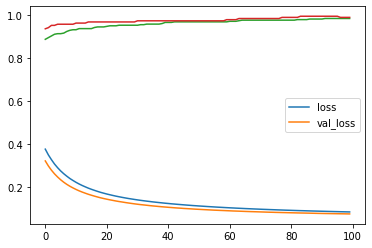

In [41]:
import matplotlib.pyplot as plt
plt.plot(r.history['loss'], label='loss')
plt.plot(r.history['val_loss'], label='val_loss')
plt.legend()

# Accuracy Plot
plt.plot(r.history['accuracy'], label = 'acc')
plt.plot(r.history['val_accuracy'], label = 'val_acc')

# **Model Prediction**

In [42]:
P = model.predict(X_test)
print(P)

[[3.59518731e-06]
 [9.11817729e-01]
 [2.07334757e-04]
 [9.68840897e-01]
 [9.77588058e-01]
 [9.73836362e-01]
 [4.80793446e-01]
 [9.96618390e-01]
 [9.72150385e-01]
 [1.92345977e-02]
 [1.59742832e-02]
 [5.47200441e-04]
 [5.63617042e-10]
 [9.98451114e-01]
 [9.98980165e-01]
 [9.29280758e-01]
 [9.98898983e-01]
 [9.96742785e-01]
 [1.90335512e-03]
 [9.99217153e-01]
 [9.92646933e-01]
 [9.98414576e-01]
 [2.63971090e-03]
 [9.91336823e-01]
 [9.91425276e-01]
 [9.99316812e-01]
 [9.97452974e-01]
 [6.03567023e-05]
 [9.99354243e-01]
 [9.98784542e-01]
 [9.95953560e-01]
 [9.95132804e-01]
 [2.82529294e-02]
 [9.84130859e-01]
 [8.67173731e-01]
 [1.23488903e-03]
 [5.52053928e-01]
 [7.85982847e-01]
 [9.89077926e-01]
 [1.59141719e-02]
 [3.65883112e-04]
 [1.30742788e-04]
 [3.66708636e-03]
 [1.31332163e-05]
 [1.89351201e-01]
 [9.93366241e-01]
 [9.97971416e-01]
 [9.98856425e-01]
 [9.92049932e-01]
 [9.99929249e-01]
 [9.91286039e-01]
 [9.99122977e-01]
 [9.18486416e-01]
 [6.05947207e-07]
 [9.78419662e-01]
 [9.754492

In [43]:
# Round off to get actual predictions
import numpy as np
P = np.round(P).flatten()
print(P)

[0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 0. 1.
 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 0. 1. 1. 1.
 1. 1. 1. 1. 1. 0. 1. 1. 0. 1. 0. 1. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 0. 1.
 1. 1. 0. 1. 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 0. 1. 1.
 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 1. 1. 0. 0. 1. 1. 0. 1.
 1. 0. 0. 1. 1. 0. 1. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1.
 0. 1. 1. 1. 0. 1. 1. 0. 0. 0. 1. 1. 0. 1. 1. 1. 0. 1. 1. 0. 1. 1. 0. 1.
 0. 1. 1. 1. 1. 1. 0. 0. 1. 0. 1. 1. 1. 0. 1. 0. 0. 1. 1. 1.]


In [44]:
print("Manually calculated accuracy: ", np.mean(P == y_test))
print("Evaluate output: ", model.evaluate(X_test, y_test))

Manually calculated accuracy:  0.9893617021276596
6/6 [==============================] - 0s 1ms/step - loss: 0.0730 - accuracy: 0.9894
Evaluate output:  [0.07304122298955917, 0.9893617033958435]


# **Save Model**

In [45]:
# Save model in a h5 file format
model.save('PredictCancer.h5')

In [46]:
# Check whether it is saved
!ls -lh

total 24K
-rw-r--r-- 1 root root  19K Jul  3 18:56 PredictCancer.h5
drwxr-xr-x 1 root root 4.0K Jun 15 13:37 sample_data


In [47]:
# Load model
model = tf.keras.models.load_model('PredictCancer.h5')
print(model.layers)
model.evaluate(X_test, y_test)

6/6 [==============================] - 0s 2ms/step - loss: 0.0730 - accuracy: 0.9894


[0.07304122298955917, 0.9893617033958435]

# **Download saved model**

In [48]:
from google.colab import files
files.download('PredictCancer.h5')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>